# task to find accuracy for all this ml model from given dataset.
# logistic regression,Logistic Regression,decision tree,random forest,svm,k nearst neighbors,naive bayes.

In [ ]:
import pandas as pd
df=pd.read_csv('wine-quality-white-and-red.csv')

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df1 = df[df['type'] == 'red']
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


corelation graph on redwine content of alcohol,and quality.

<Axes: xlabel='quality', ylabel='alcohol'>

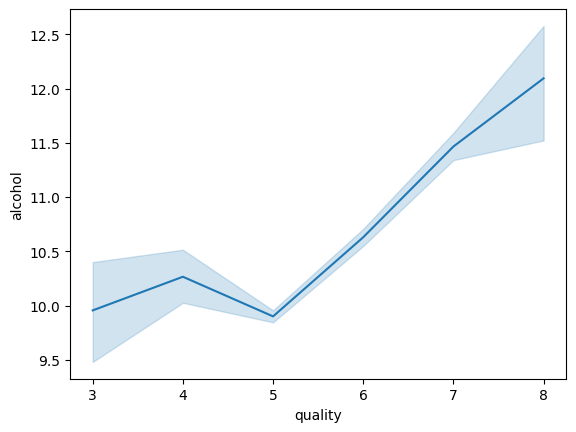

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df1,x='quality',y='alcohol')

In [ ]:
df.shape

(6497, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
y=df['type']
x=df.drop('type',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# logistic regression,Logistic Regression,decision tree,random forest,svm,k nearst neighbors,naive bayes.

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

array(['white', 'white', 'white', 'white', 'white'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[290,  24],
       [ 13, 973]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9715384615384616

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# making objects
cm=LogisticRegression()
dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svm=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()

In [ ]:
# making a list of all used ml algorthim
m1_names=['Logistic Regression','decision tree','random forest','svm','k nearst neighbors','naive bayes']

# making a list of all used mlalgorthim object
ml_object=[cm,dtree,rfc,svm,knn,nb]

# using for loop to check accuracy for all algorthm
for i,j in zip(m1_names,ml_object):

# traning predicition for all algirothm
   j.fit(x_train,y_train)

# testing predicition for all algirothm
   pred=j.predict(x_test)

# priniting accuracy for all algorthim
   print(f'{i}: {(accuracy_score(y_test,pred)*100):.2f}%\n')
   print(classification_report(y_test,pred))
   print(confusion_matrix(y_test,pred))
   print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 97.15%

              precision    recall  f1-score   support

         red       0.96      0.92      0.94       314
       white       0.98      0.99      0.98       986

    accuracy                           0.97      1300
   macro avg       0.97      0.96      0.96      1300
weighted avg       0.97      0.97      0.97      1300

[[290  24]
 [ 13 973]]

decision tree: 98.46%

              precision    recall  f1-score   support

         red       0.97      0.96      0.97       314
       white       0.99      0.99      0.99       986

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300

[[302  12]
 [  8 978]]

random forest: 99.69%

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       314
       white       1.00      1.00      1.00       986

    accuracy                           1.00      1300
   ma